In [1]:
from PIL import Image
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

import ipywidgets as widgets
from ipywidgets import interactive
import h5py

import os

Matplotlib is building the font cache; this may take a moment.


In [2]:
nexus_file = "/SNS/VENUS/IPTS-34969/nexus/VENUS_7703.nxs.h5"
profile_width = 10
list_pixel_to_exclude = set()

with h5py.File(nexus_file, 'r') as hdf5_data:
    event_time_offset_original = hdf5_data['entry']['bank100_events']['event_time_offset'][:]
    event_id_original = hdf5_data['entry']['bank100_events']['event_id'][:]

offset_value = 1000000  # Offset value
event_id_original -= offset_value

# DEBUGGING: Work with only the first n events
# n_events = min(len(event_time_offset_original), 300000000)
# event_time_offset = event_time_offset_original[:n_events]
# event_id = event_id_original[:n_events]
event_id = event_id_original

# hist, bin_edges = np.histogram(event_time_offset, bins=1000, range=(0, 16667))

# Vectorized mapping function
def map_pixels_to_coordinates(pixel_ids):
    rows = pixel_ids % 512
    cols = pixel_ids // 512
    return rows, cols

# Initialize the full image
full_image = np.zeros((512, 512), dtype=np.int32)

# Vectorized processing
rows, cols = map_pixels_to_coordinates(event_id)
np.add.at(full_image, (cols, rows), 1)

image = full_image.astype(np.float32)

Text(0.5, 1.0, 'Timepix3 Data')

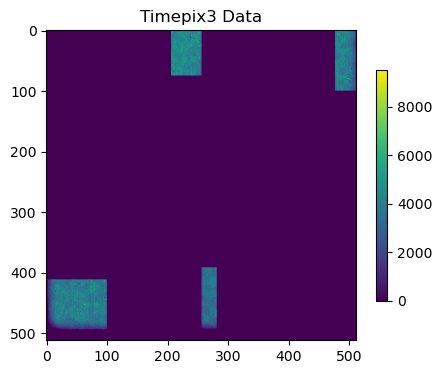

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
im = ax.imshow(image, cmap='viridis')
fig.colorbar(im, ax=ax, shrink=0.6)
ax.set_title('Timepix3 Data')


In [6]:
chip1 = image[0:256, 256:]
chip2 = image[0:256, 0:256]
chip3 = image[256: , 0:256]
chip4 = image[256: , 256:]

Text(0.5, 1.0, 'Chip 4')

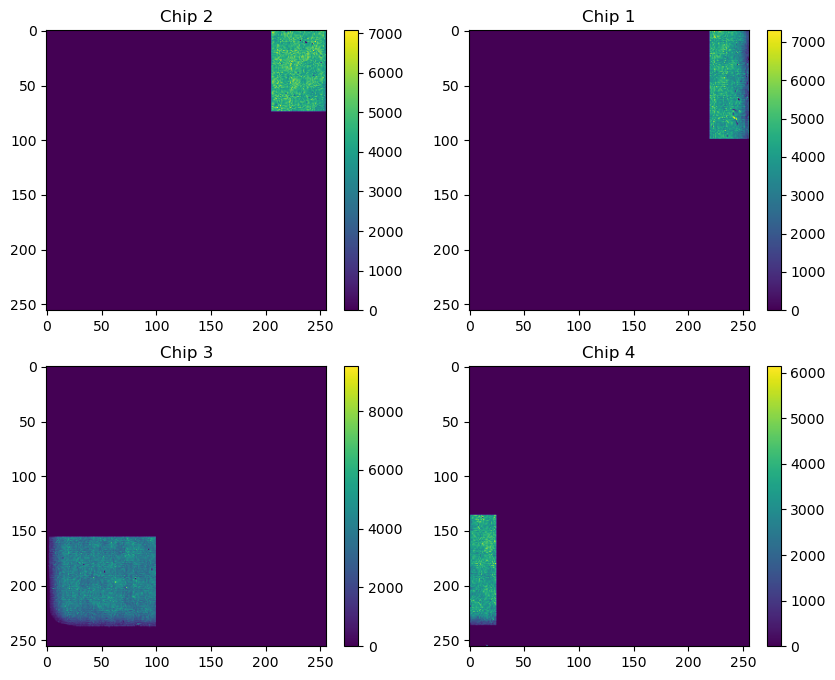

In [10]:
cmap = 'viridis' # 'gray', 'viridis', 'plasma', 'inferno', 'magma', 'cividis'

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
im01 = axs[0, 1].imshow(chip1, cmap=cmap)
fig.colorbar(im01, ax=axs[0, 1])
axs[0, 1].set_title('Chip 1')

im02 = axs[0, 0].imshow(chip2, cmap=cmap)
fig.colorbar(im02, ax=axs[0, 0])
axs[0, 0].set_title('Chip 2')

im03 = axs[1, 0].imshow(chip3, cmap=cmap)
fig.colorbar(im03, ax=axs[1, 0])    
axs[1, 0].set_title('Chip 3')

im04 = axs[1, 1].imshow(chip4, cmap=cmap)
fig.colorbar(im04, ax=axs[1, 1])
axs[1, 1].set_title('Chip 4')


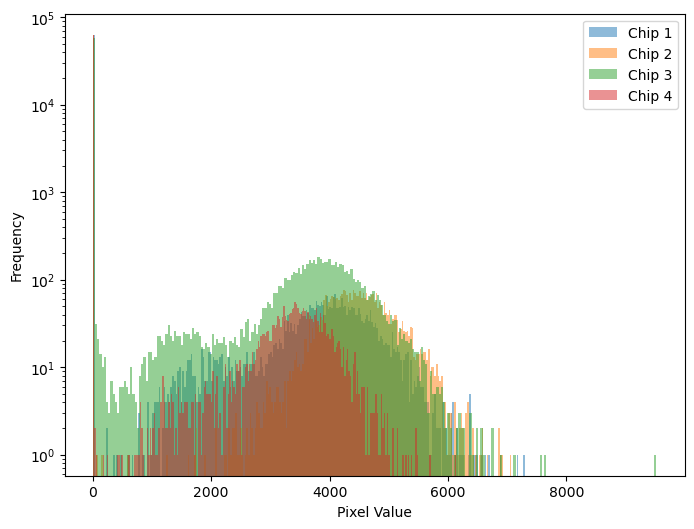

In [11]:
# compare histograms of each chips
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(chip1.ravel(), bins=256, alpha=0.5, label='Chip 1')
ax.hist(chip2.ravel(), bins=256, alpha=0.5, label='Chip 2')
ax.hist(chip3.ravel(), bins=256, alpha=0.5, label='Chip 3')
ax.hist(chip4.ravel(), bins=256, alpha=0.5, label='Chip 4')
ax.set_yscale('log')
ax.set_xlabel('Pixel Value')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

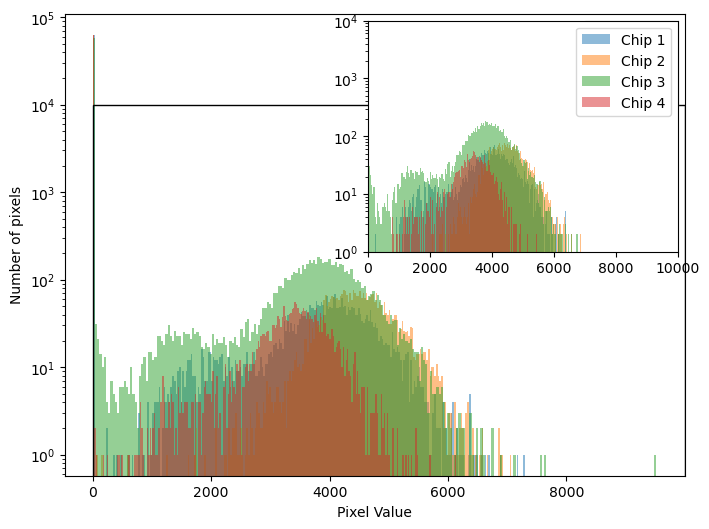

In [19]:
# compare histograms of each chips
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(chip1.ravel(), bins=256, alpha=0.5, label='Chip 1')
ax.hist(chip2.ravel(), bins=256, alpha=0.5, label='Chip 2')
ax.hist(chip3.ravel(), bins=256, alpha=0.5, label='Chip 3')
ax.hist(chip4.ravel(), bins=256, alpha=0.5, label='Chip 4')
ax.set_yscale('log')
ax.set_xlabel('Pixel Value')
ax.set_ylabel('Number of pixels')
ax.legend()

ax_inset = inset_axes(ax, width="50%", height="50%", loc='upper right')
ax_inset.hist(chip1.ravel(), bins=256, alpha=0.5, label='Chip 1')
ax_inset.hist(chip2.ravel(), bins=256, alpha=0.5, label='Chip 2')
ax_inset.hist(chip3.ravel(), bins=256, alpha=0.5, label='Chip 3')
ax_inset.hist(chip4.ravel(), bins=256, alpha=0.5, label='Chip 4')
ax_inset.set_yscale('log')
ax_inset.set_xlim(0, 10000)  # Focus on the range 0
ax_inset.set_ylim(1, 1e4)
ax_inset.legend()

rect = patches.Rectangle((0, 0), 10000, 1e4, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect)

plt.show()

In [12]:
# let's get the statistics of each chip
def chip_stats(chip, stat):
    stat['min'].append(np.min(chip))
    stat['max'].append(np.max(chip))
    stat['mean'].append(np.mean(chip))
    stat['median'].append(np.median(chip))
    stat['std'].append(np.std(chip))
    stat['sum'].append(np.sum(chip))
 
stat = {'min': [], 'max': [], 'mean': [], 'median': [], 'std': [], 'sum': []}
chip_stats(chip1, stat)
chip_stats(chip2, stat)
chip_stats(chip3, stat)
chip_stats(chip4, stat)


[Text(0, 0, 'Chip 1'),
 Text(1, 0, 'Chip 2'),
 Text(2, 0, 'Chip 3'),
 Text(3, 0, 'Chip 4')]

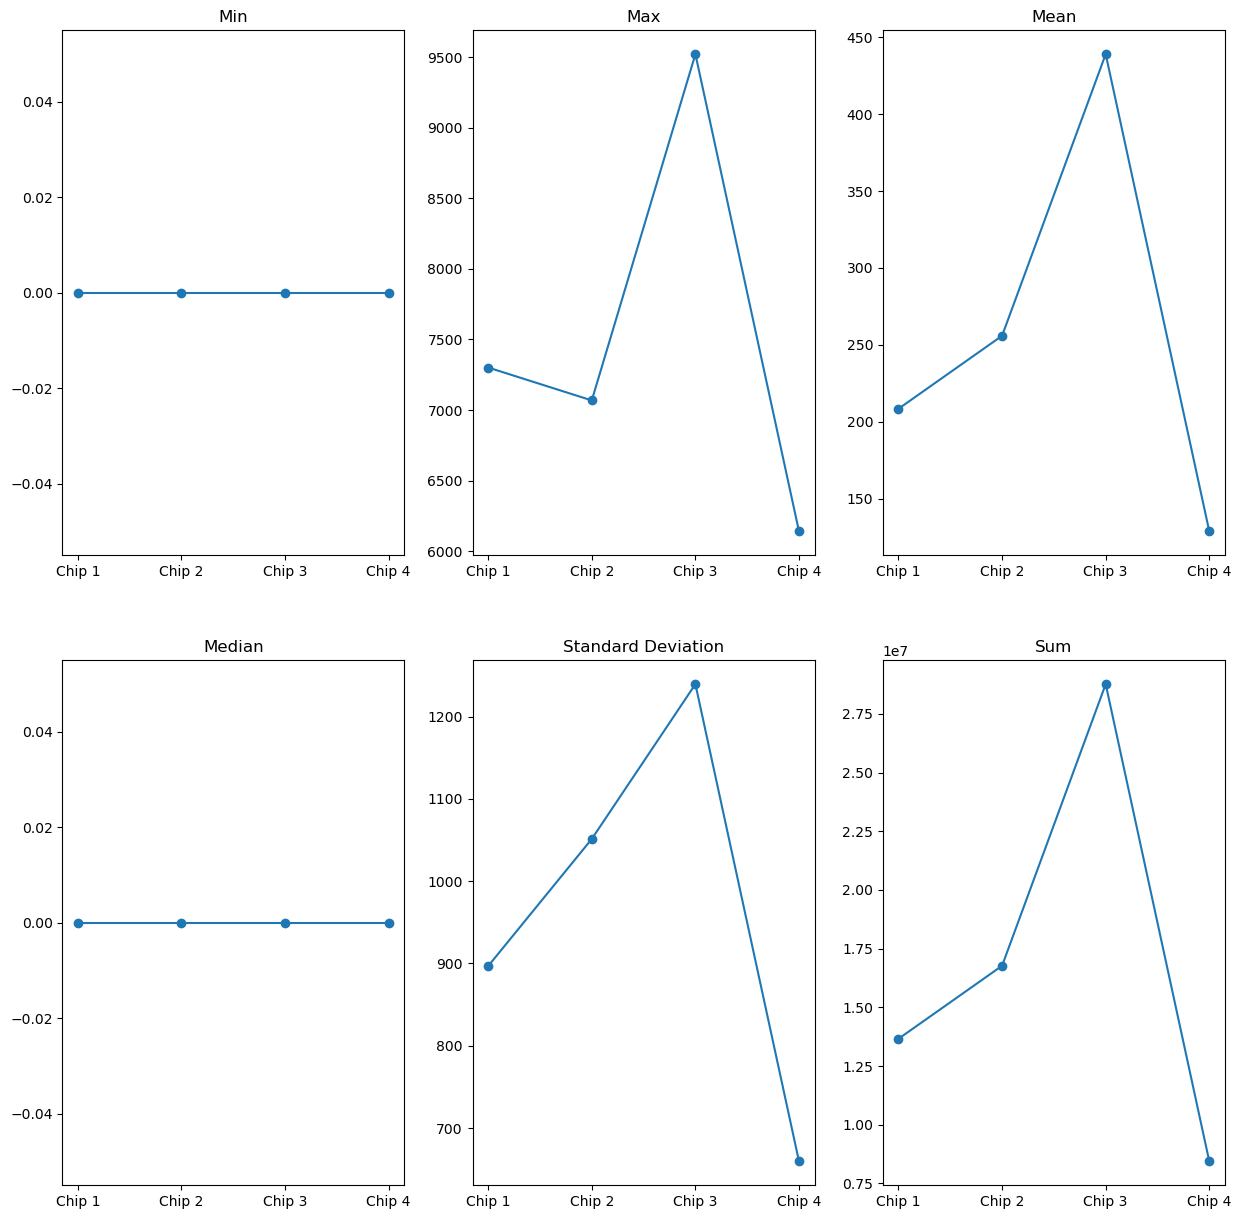

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
axs[0][0].plot(stat['min'], marker='o')
axs[0][0].set_title('Min')
axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[0][1].plot(stat['max'], marker='o')
axs[0][1].set_title('Max')
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[0][2].plot(stat['mean'], marker='o')
axs[0][2].set_title('Mean')
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[1][0].plot(stat['median'], marker='o')
axs[1][0].set_title('Median')
axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[1][1].plot(stat['std'], marker='o')
axs[1][1].set_title('Standard Deviation')
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[1][2].plot(stat['sum'], marker='o')
axs[1][2].set_title('Sum')
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])


In [14]:
# locate all the dead pixels (value = 0 )
dead_pixels_chip1 = np.where(chip1 == 0)
dead_pixels_chip2 = np.where(chip2 == 0)
dead_pixels_chip3 = np.where(chip3 == 0)
dead_pixels_chip4 = np.where(chip4 == 0)

print(f"Dead pixels in Chip 1: {len(dead_pixels_chip1[0])}")
print(f"Dead pixels in Chip 2: {len(dead_pixels_chip2[0])}")
print(f"Dead pixels in Chip 3: {len(dead_pixels_chip3[0])}")
print(f"Dead pixels in Chip 4: {len(dead_pixels_chip4[0])}")

Dead pixels in Chip 1: 61924
Dead pixels in Chip 2: 61782
Dead pixels in Chip 3: 57348
Dead pixels in Chip 4: 62952


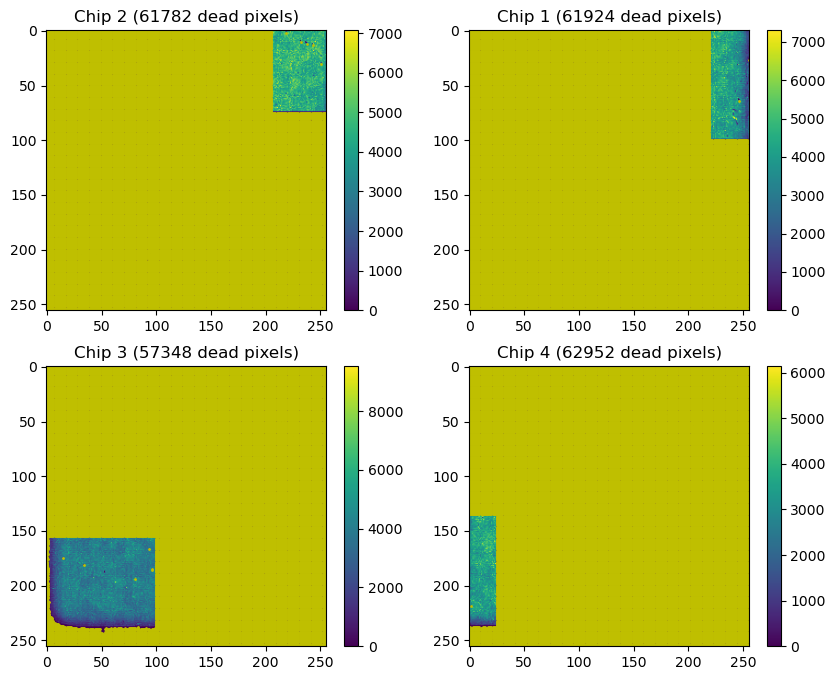

In [15]:
# highlight the dead pixels in each chip
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
im01 = axs[0, 1].imshow(chip1, cmap=cmap)
axs[0, 1].scatter(dead_pixels_chip1[1], dead_pixels_chip1[0], color='y', s=1)
fig.colorbar(im01, ax=axs[0, 1])
axs[0, 1].set_title(f'Chip 1 ({len(dead_pixels_chip1[0])} dead pixels)')
im02 = axs[0, 0].imshow(chip2, cmap=cmap)
axs[0, 0].scatter(dead_pixels_chip2[1], dead_pixels_chip2[0], color='y', s=1)
fig.colorbar(im02, ax=axs[0, 0])
axs[0, 0].set_title(f'Chip 2 ({len(dead_pixels_chip2[0])} dead pixels)')
im03 = axs[1, 0].imshow(chip3, cmap=cmap)
axs[1, 0].scatter(dead_pixels_chip3[1], dead_pixels_chip3[0], color='y', s=1)
fig.colorbar(im03, ax=axs[1, 0])    
axs[1, 0].set_title(f'Chip 3 ({len(dead_pixels_chip3[0])} dead pixels)')
im04 = axs[1, 1].imshow(chip4, cmap=cmap)
axs[1, 1].scatter(dead_pixels_chip4[1], dead_pixels_chip4[0], color='y', s=1)
fig.colorbar(im04, ax=axs[1, 1])
axs[1, 1].set_title(f'Chip 4 ({len(dead_pixels_chip4[0])} dead pixels)')
plt.show()

In [16]:
# locate the crazy high pixels
threshold_value = 6000
high_value_pixels_chip1 = np.where(chip1 > threshold_value)
high_value_pixels_chip2 = np.where(chip2 > threshold_value)
high_value_pixels_chip3 = np.where(chip3 > threshold_value)
high_value_pixels_chip4 = np.where(chip4 > threshold_value)

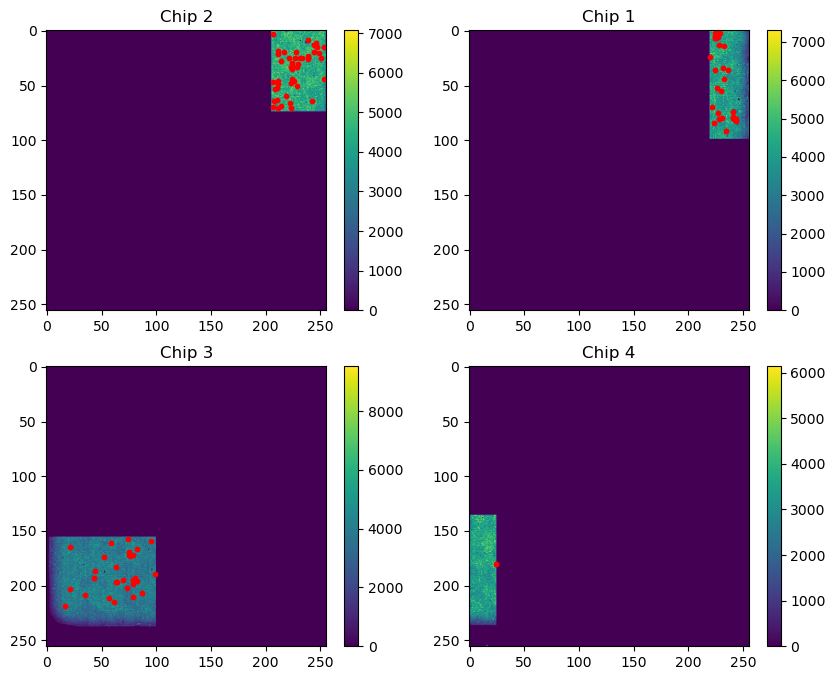

In [17]:
# highlights where are the crazy high pixels (value > threshold_value)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
im01 = axs[0, 1].imshow(chip1, cmap=cmap)
axs[0, 1].scatter(high_value_pixels_chip1[1], high_value_pixels_chip1[0], color='red', s=10)
fig.colorbar(im01, ax=axs[0, 1])
axs[0, 1].set_title('Chip 1')

im02 = axs[0, 0].imshow(chip2, cmap=cmap)
axs[0, 0].scatter(high_value_pixels_chip2[1], high_value_pixels_chip2[0], color='red', s=10)
fig.colorbar(im02, ax=axs[0, 0])
axs[0, 0].set_title('Chip 2')     

im03 = axs[1, 0].imshow(chip3, cmap=cmap)
axs[1, 0].scatter(high_value_pixels_chip3[1], high_value_pixels_chip3[0], color='red', s=10)
fig.colorbar(im03, ax=axs[1, 0])    
axs[1, 0].set_title('Chip 3')   

im04 = axs[1, 1].imshow(chip4, cmap=cmap)
axs[1, 1].scatter(high_value_pixels_chip4[1], high_value_pixels_chip4[0], color='red', s=10)
fig.colorbar(im04, ax=axs[1, 1])
axs[1, 1].set_title('Chip 4')  
plt.show()  

In [18]:
# interactve plot to explore the high value pixels
max_value = np.max(image)

def plot_chip(high_value_pixels, low_value_pixels=0):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    high_value_pixels_chip1 = np.where(chip1 > high_value_pixels)
    low_value_pixels_chip1 = np.where(chip1 <= low_value_pixels) 

    high_value_pixels_chip2 = np.where(chip2 > high_value_pixels)
    low_value_pixels_chip2 = np.where(chip2 <= low_value_pixels)

    high_value_pixels_chip3 = np.where(chip3 > high_value_pixels)
    low_value_pixels_chip3 = np.where(chip3 <= low_value_pixels)
    
    high_value_pixels_chip4 = np.where(chip4 > high_value_pixels)
    low_value_pixels_chip4 = np.where(chip4 <= low_value_pixels)

    im01 = axs[0, 1].imshow(chip1, cmap=cmap)
    axs[0, 1].scatter(high_value_pixels_chip1[1], high_value_pixels_chip1[0], color='red', s=10)
    axs[0, 1].scatter(low_value_pixels_chip1[1], low_value_pixels_chip1[0], color='yellow', s=1)
    fig.colorbar(im01, ax=axs[0, 1])
    axs[0, 1].set_title('Chip 1')

    im02 = axs[0, 0].imshow(chip2, cmap=cmap)
    axs[0, 0].scatter(high_value_pixels_chip2[1], high_value_pixels_chip2[0], color='red', s=10)
    axs[0, 0].scatter(low_value_pixels_chip2[1], low_value_pixels_chip2[0], color='yellow', s=1)
    fig.colorbar(im02, ax=axs[0, 0])
    axs[0, 0].set_title('Chip 2')     

    im03 = axs[1, 0].imshow(chip3, cmap=cmap)
    axs[1, 0].scatter(high_value_pixels_chip3[1], high_value_pixels_chip3[0], color='red', s=10)
    axs[1, 0].scatter(low_value_pixels_chip3[1], low_value_pixels_chip3[0], color='yellow', s=1)
    fig.colorbar(im03, ax=axs[1, 0])    
    axs[1, 0].set_title('Chip 3')   

    im04 = axs[1, 1].imshow(chip4, cmap=cmap)
    axs[1, 1].scatter(high_value_pixels_chip4[1], high_value_pixels_chip4[0], color='red', s=10)
    axs[1, 1].scatter(low_value_pixels_chip4[1], low_value_pixels_chip4[0], color='yellow', s=1)
    fig.colorbar(im04, ax=axs[1, 1])
    axs[1, 1].set_title('Chip 4')  
    # plt.show()  
   
display_plot = interactive(plot_chip, 
                           high_value_pixels=widgets.IntSlider(min=0, 
                                                               max=max_value, 
                                                               step=500, 
                                                               value=max_value, 
                                                               continuous_update=False,
                                                               description='High Value Pixels >',
                                                               layout=widgets.Layout(width='100%')),
                           low_value_pixels=widgets.IntSlider(min=0, 
                                                              max=max_value, 
                                                              step=100, 
                                                              value=0, 
                                                              continuous_update=False,
                                                              description='Low Value Pixels <=',
                                                              layout=widgets.Layout(width='100%'))
                          )
display(display_plot)


interactive(children=(IntSlider(value=9521, continuous_update=False, description='High Value Pixels >', layout…